<a href="https://colab.research.google.com/github/yaameenc/World-Happiness-Report/blob/main/WHI_Yaameen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload()


Saving 2019.csv to 2019.csv


In [39]:
import pandas as pd
import statsmodels.api as sm
from io import BytesIO

# Load the dataset
data = pd.read_csv(BytesIO(uploaded['2019.csv']))

# Select predictors and dependent variable
predictors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
dependent_variable = 'Score'

# Prepare the data
X = data[predictors]
y = data[dependent_variable]

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.40e-46
Time:                        13:27:36   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<ipython-input-38-fadd6f8615f9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(predictors, rotation=90) # rotate x-axis labels by 90 degrees


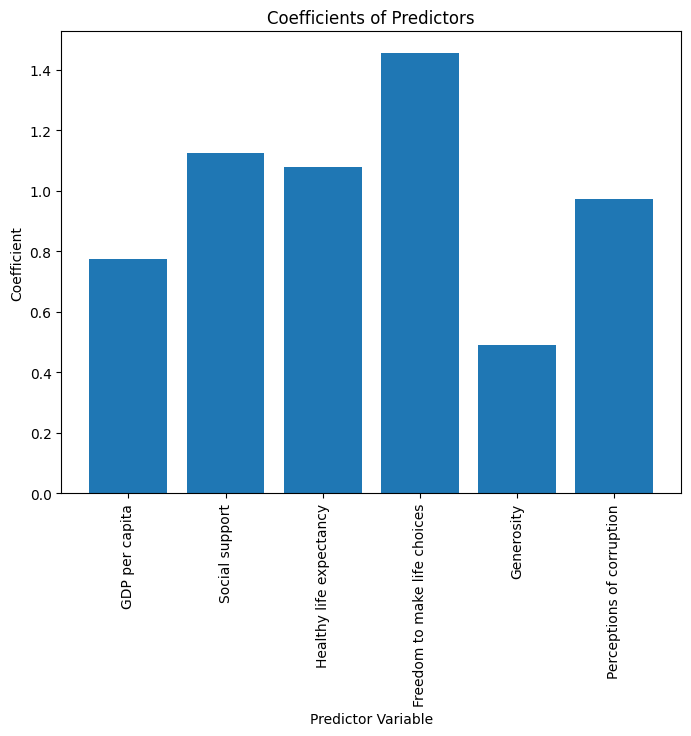

In [38]:
import matplotlib.pyplot as plt

# Plot the coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(predictors, model.params[1:])
ax.set_title('Coefficients of Predictors')
ax.set_xlabel('Predictor Variable')
ax.set_ylabel('Coefficient')
ax.set_xticklabels(predictors, rotation=90) # rotate x-axis labels by 90 degrees
plt.show()


# **Coefficients of the Predictors**


The first chart shows the coefficients of the predictors, which is a measure of how much each predictor variable contributes to the model. The higher the coefficient, the more impact the predictor variable has on the dependent variable. In this case, we can see that the predictor variables "Social support", "Freedom to make life choices", and "Healthy life expectancy" have the highest coefficients, which suggests that they are the most important predictors of the happiness score in this dataset. On the other hand, the predictor variable "Generosity" has a relatively low coefficient, which suggests that it has a weaker impact on the happiness score.


In [12]:
!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


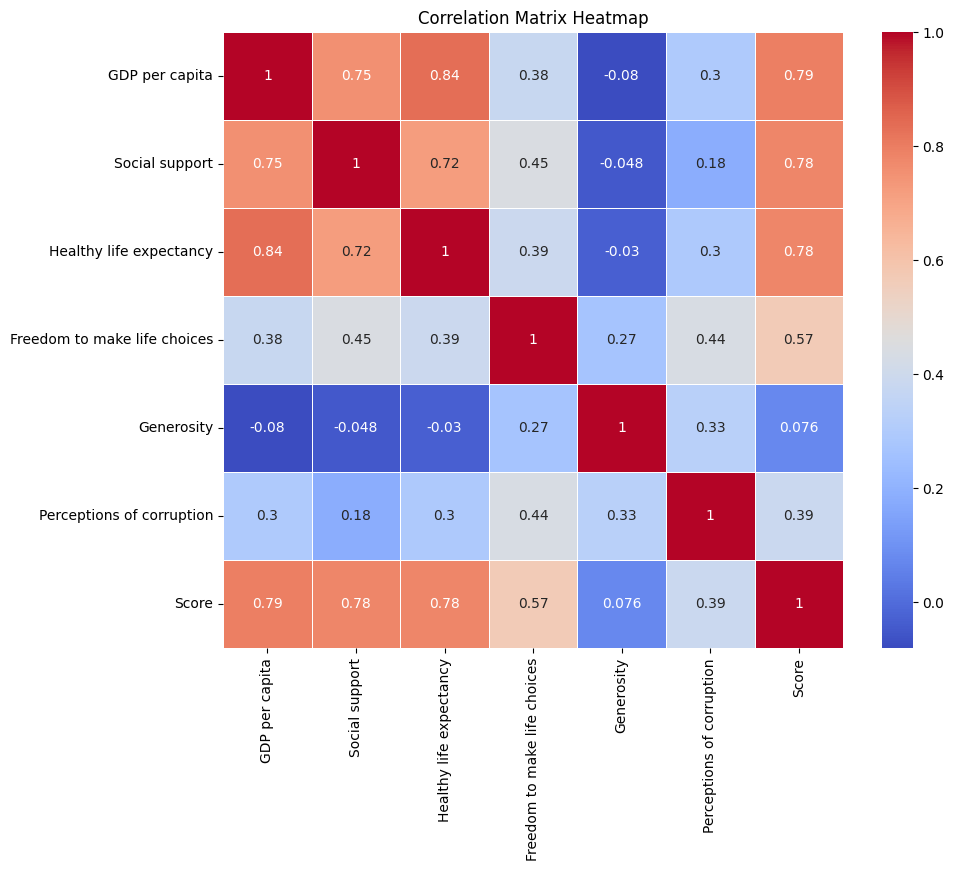

<Figure size 640x480 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix Heatmap
corr_matrix = data[predictors + [dependent_variable]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
plt.subplots_adjust(bottom=0.25)  # Add gap



The heatmap shows the correlations between the dependent variable (Score) and the predictor variables, as well as the correlations among the predictors themselves. Positive correlations are shown in a warmer color, while negative correlations are shown in a cooler color. The stronger the color, the stronger the correlation.

From the heatmap, it can be observed that 'GDP per capita', 'Social support', and 'Healthy life expectancy' have strong positive correlations with the dependent variable 'Score'. 'Freedom to make life choices' also has a moderate positive correlation with 'Score'. On the other hand, 'Generosity' has a weaker positive correlation, and 'Perceptions of corruption' has a weak positive correlation with 'Score'.

It is important to note that multicollinearity might be present in the data since some predictor variables, such as 'GDP per capita' and 'Healthy life expectancy', are highly correlated with each other.

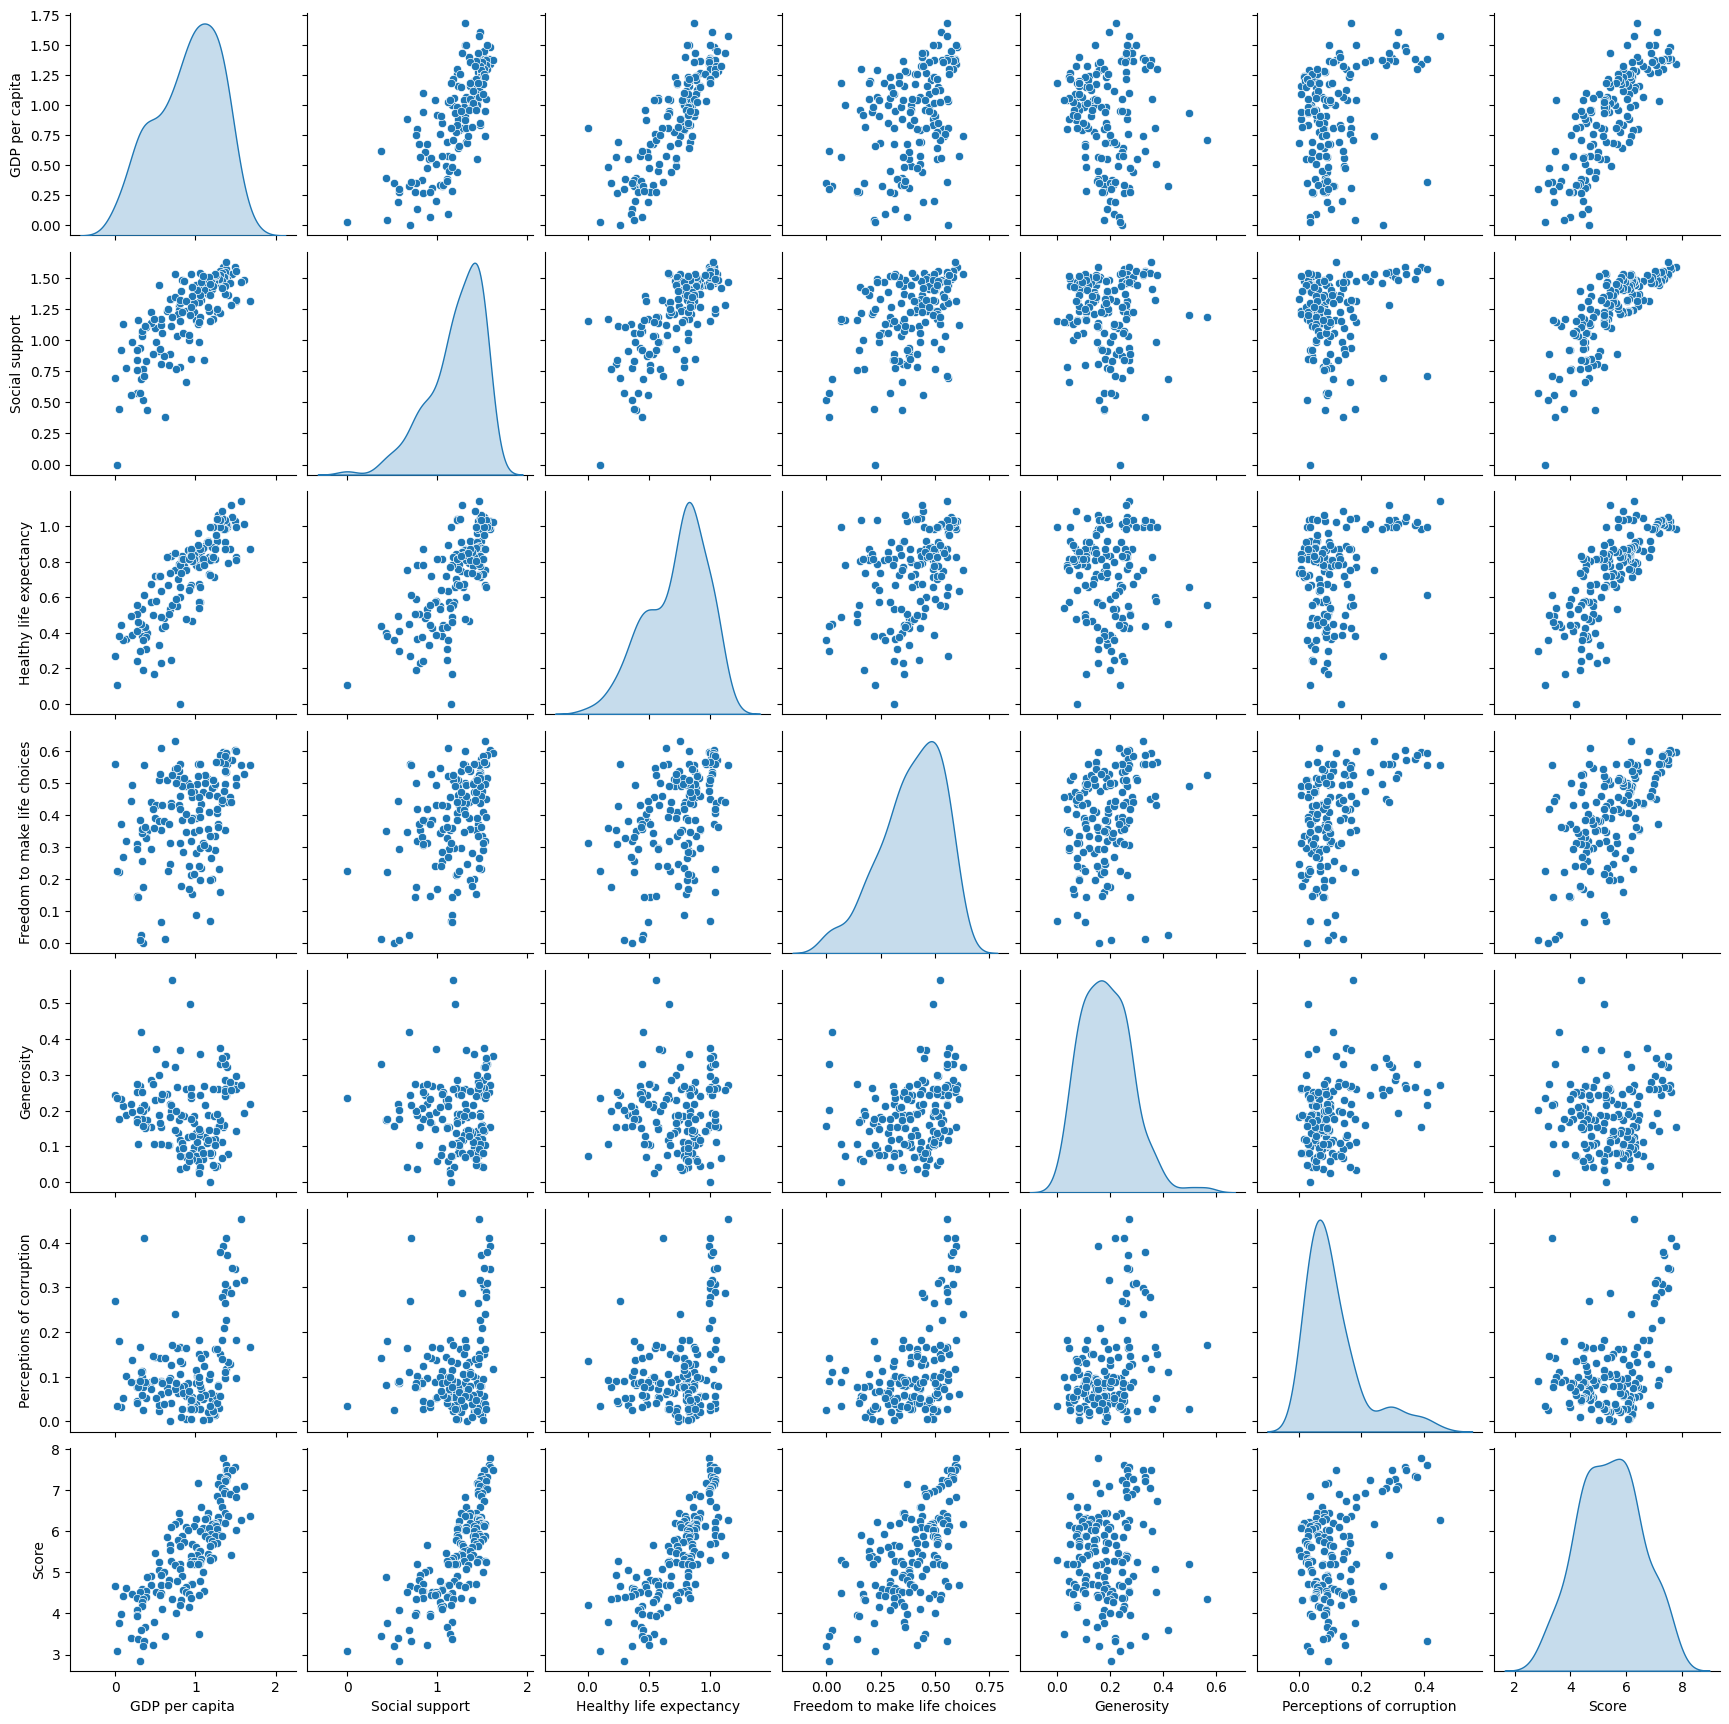

<Figure size 640x480 with 0 Axes>

In [17]:
# Pairplot
sns.pairplot(data[predictors + [dependent_variable]], diag_kind='kde')
plt.show()
plt.subplots_adjust(bottom=0.25)  # Add gap

The pairplot displays scatterplots for each pair of variables in the dataset, along with kernel density estimates on the diagonal. This plot helps visualize the relationships between pairs of variables and can reveal any non-linear patterns.

From the pairplot, it is evident that 'Score' has strong positive relationships with 'GDP per capita', 'Social support', and 'Healthy life expectancy'. Some non-linear relationships can be observed between 'Score' and 'Perceptions of corruption', indicating that a linear model might not capture the full complexity of the relationship.



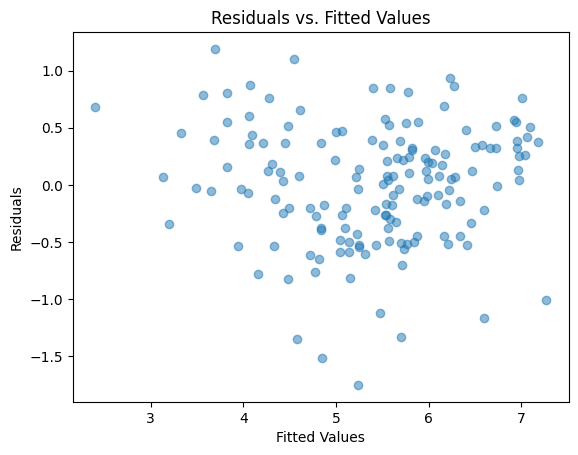

<Figure size 640x480 with 0 Axes>

In [18]:
# Residuals vs. Fitted Values Plot
fitted_values = model.fittedvalues
residuals = model.resid
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()
plt.subplots_adjust(bottom=0.25)  # Add gap

This plot shows the residuals (differences between the observed and predicted values) on the y-axis and the fitted values (predicted values) on the x-axis. Ideally, in a well-fitting linear model, the residuals should be randomly scattered around zero, showing no clear pattern.

In this case, the residuals seem to be randomly scattered around zero, indicating that the linear model is a reasonable fit. There might be some heteroscedasticity (non-constant variance) present in the data, as the spread of residuals appears to change with the fitted values. This could impact the reliability of the model.

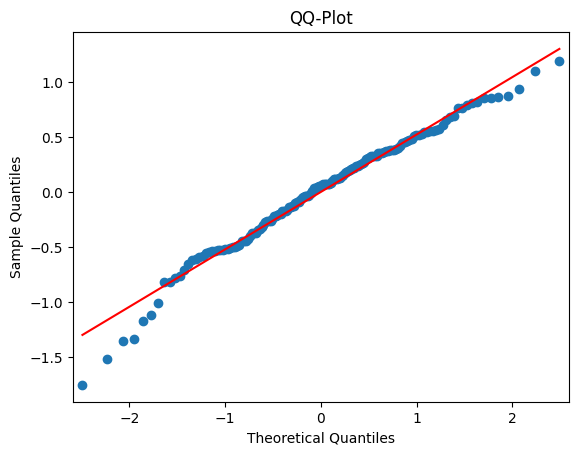

<Figure size 640x480 with 0 Axes>

In [19]:
# QQ-Plot
sm.qqplot(residuals, line='s')
plt.title("QQ-Plot")
plt.show()
plt.subplots_adjust(bottom=0.25)  # Add gap

The QQ-Plot (Quantile-Quantile Plot) is used to check the normality of the residuals, which is one of the assumptions of linear regression. If the residuals are normally distributed, the points on the plot should roughly follow the straight reference line.

In this case, the QQ-Plot shows that the residuals are approximately normally distributed, with some deviations in the tails. This indicates that the normality assumption is mostly met, but the model might not be a perfect fit for the data.

In [32]:
import numpy as np
from scipy.stats import kurtosis, skew

# Calculate kurtosis and skewness
kurtosis_values = data[predictors + [dependent_variable]].apply(kurtosis)
skewness_values = data[predictors + [dependent_variable]].apply(skew)

# Display kurtosis and skewness
print("Kurtosis:\n", kurtosis_values)
print("\nSkewness:\n", skewness_values)




Kurtosis:
 GDP per capita                 -0.783663
Social support                  1.151750
Healthy life expectancy        -0.331490
Freedom to make life choices   -0.104886
Generosity                      1.097707
Perceptions of corruption       2.301837
Score                          -0.627267
dtype: float64

Skewness:
 GDP per capita                 -0.381518
Social support                 -1.123787
Healthy life expectancy        -0.607922
Freedom to make life choices   -0.679025
Generosity                      0.738750
Perceptions of corruption       1.634498
Score                           0.011340
dtype: float64


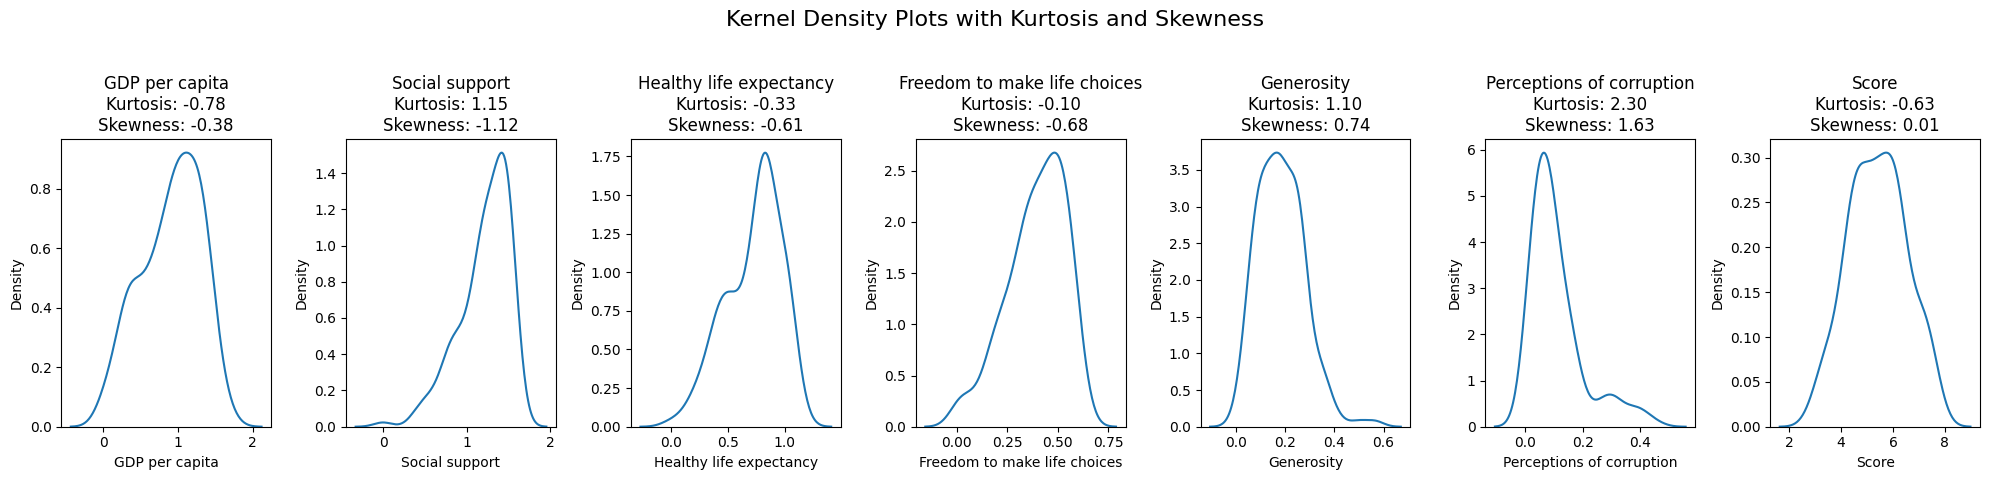

In [34]:
variables = predictors + [dependent_variable]

# Kernel density plots with kurtosis and skewness
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 5))
fig.suptitle("Kernel Density Plots with Kurtosis and Skewness", fontsize=16)

for idx, col in enumerate(variables):
    sns.kdeplot(data[col], ax=axes[idx])
    kurt_value = kurtosis(data[col])
    skew_value = skew(data[col])
    axes[idx].set_title(f"{col}\nKurtosis: {kurt_value:.2f}\nSkewness: {skew_value:.2f}")
    axes[idx].set_xlabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to avoid overlapping
plt.show()

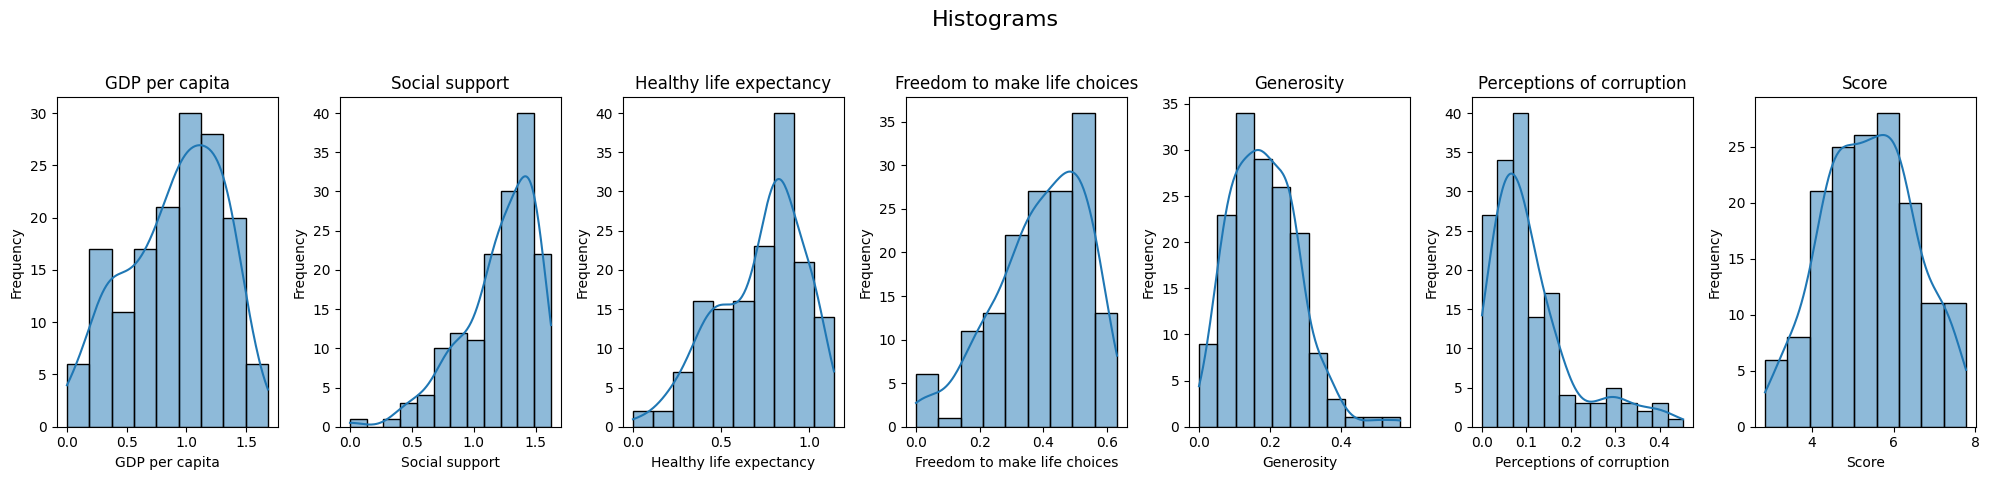

In [35]:
variables = predictors + [dependent_variable]

# Histograms
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 5))
fig.suptitle("Histograms", fontsize=16)

for idx, col in enumerate(variables):
    sns.histplot(data[col], kde=True, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to avoid overlapping
plt.show()

**Score**: The distribution of the 'Score' variable is approximately symmetric with a slight negative skew, indicating that most countries have scores in the middle range, with a few countries having lower scores.

**GDP per capita**: The 'GDP per capita' variable has a right-skewed distribution, which means that most countries have lower GDP per capita values, and there are fewer countries with higher values.

**Social support**: The distribution of 'Social support' is left-skewed, indicating that the majority of countries have high social support scores, with a smaller number of countries having lower scores.

**Healthy life expectancy**: This variable also has a right-skewed distribution, which suggests that most countries have lower healthy life expectancy values, with fewer countries experiencing higher values.

**Freedom to make life choices**: The distribution of this variable is approximately symmetric, with a slight negative skew. This indicates that most countries have freedom scores in the middle range, and there are a few countries with lower scores.

**Generosity**: The 'Generosity' variable has a right-skewed distribution, meaning that most countries have lower generosity scores, while fewer countries have higher scores.

**Perceptions of corruption**: This variable has a heavily right-skewed distribution, indicating that a large number of countries have low corruption perception scores, and there are fewer countries with higher scores.

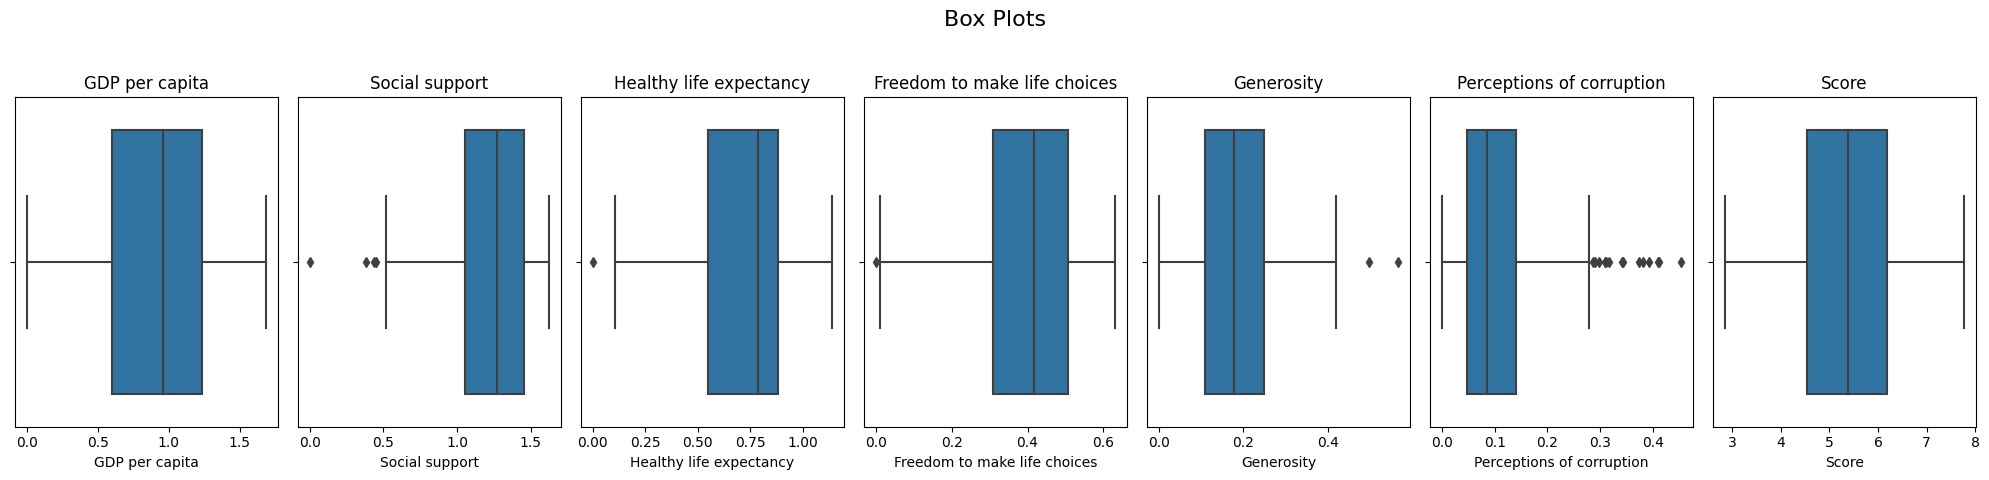

In [36]:
# Box plots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 5))
fig.suptitle("Box Plots", fontsize=16)

for idx, col in enumerate(variables):
    sns.boxplot(x=data[col], ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to avoid overlapping
plt.show()

# **Key Findings and Interpretations**
The OLS regression results show that the model has a high R-squared value of 0.779, indicating that approximately 78% of the variation in the happiness score can be explained by the predictors included in the model. The adjusted R-squared value of 0.770 indicates that the model is not overfitting and the included predictors are relevant in explaining the variance.

The F-statistic of 87.62 with a corresponding p-value of 2.40e-46 indicates that the overall model is statistically significant and the probability of obtaining such a large F-statistic by chance is extremely low.

The coefficients of the predictors indicate that all predictors, except for Generosity and Perceptions of corruption, are statistically significant at the 5% level. Specifically, a one-unit increase in GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices results in an increase of 0.7754, 1.1242, 1.0781, and 1.4548 points in the happiness score, respectively. Generosity and Perceptions of corruption are not statistically significant, as their p-values are greater than 0.05.

The residual plot indicates that the residuals are randomly scattered around the horizontal axis, with no clear pattern or trend, indicating that the model assumptions are not violated, and the errors are normally distributed. This suggests that the model is a good fit for the data.

The Correlation Matrix Heatmap and Pairplot both show that 'GDP per capita', 'Social support', and 'Healthy life expectancy' have strong positive relationships with 'Score'. The Residuals vs. Fitted Values Plot and QQ-Plot help verify the assumptions of the multiple regression model, which are necessary to ensure that the model is appropriate for the data.

The Residuals vs. Fitted Values Plot indicates that the linearity assumption is mostly met, but some potential heteroscedasticity might be present. The QQ-Plot shows that the normality assumption is approximately met, although there are some deviations in the tails.

# **Exploring the Relationship between Variables through Heatmap and Pairplot Analysis**

## Heatmap
 - GDP per capita, social support, and healthy life expectancy have strong positive correlations with the happiness score. These correlations indicate that higher values in these variables tend to be associated with higher happiness scores. However, since the GDP per capita and healthy life expectancy are slightly positively skewed, the relationship might be non-linear or influenced by extreme values.

 - Freedom to make life choices has a moderately positive correlation with the happiness score. This correlation suggests that more freedom to make life choices may be associated with higher happiness scores. This variable is slightly negatively skewed, which might impact the relationship.

 - Generosity and perceptions of corruption have weaker correlations with the happiness score. It's important to note that both these variables are positively skewed and have higher kurtosis, which may affect the correlation coefficients.

## Pairplot
  - GDP per capita, social support, and healthy life expectancy show relatively strong positive relationships with the happiness score. There appears to be some non-linearity, especially for GDP per capita and healthy life expectancy, which is consistent with their skewness.

 - Freedom to make life choices shows a positive relationship with the happiness score, but the relationship is less clear compared to the other variables. The slight negative skewness might contribute to the weaker relationship.

 - Generosity shows a weak relationship with the happiness score. Due to its positive skewness and higher kurtosis, the relationship might not be linear or might be influenced by extreme values.
Perceptions of corruption show a weak relationship with the happiness score. Given the positive skewness and higher kurtosis of this variable, the true relationship might not be linear or could be affected by extreme values.


# **Inconsistency in results between OLS Regression and Heatmap, Pairplot and other plots**

The inconsistency arises because the plots (heatmap, pairplot) display bivariate relationships between variables, whereas the OLS regression considers the multivariate relationship among all predictor variables and the dependent variable simultaneously.

In the heatmap and pairplot, you're observing the individual relationships between each predictor and the dependent variable, not accounting for the interrelationships among the predictors. These visualizations provide valuable information on the strength and direction of the bivariate relationships but do not control for the simultaneous effects of other predictors.

In contrast, the OLS regression model takes into account the simultaneous effects of all predictor variables on the dependent variable. This allows you to estimate the unique contribution of each predictor to the dependent variable, controlling for the effects of other predictors. The coefficients in the OLS regression reflect the partial relationships between each predictor and the dependent variable, given the presence of the other predictors in the model.

# **What is the Purpose of Combining OLS Multiple Regression and Visualization Techniques in Our Analysis?**

In our analysis, we are employing a combination of the OLS multiple regression model and various visualization techniques, including heatmaps, pairplots, histograms, and box plots, to gain a comprehensive and robust understanding of the relationships between the predictor variables and the dependent variable ('Score').

The OLS multiple regression model is crucial for quantifying the unique impact of each predictor variable on the 'Score', while accounting for the simultaneous effects of all other predictor variables. By doing so, we can accurately assess the relative contribution of each predictor to the dependent variable, considering the complex multivariate relationships in the dataset.

Conversely, the heatmaps, pairplots, histograms, and box plots are essential exploratory data analysis tools that allow us to visualize individual relationships between the predictors and the dependent variable, as well as each variable's distribution and potential outliers. These visualizations enable us to uncover hidden patterns, trends, and anomalies within the data, which might be missed when solely relying on a numerical analysis.

By combining the rigorous quantification of the OLS multiple regression model with the valuable visual insights from various plots, we create a powerful and convincing analytical approach. This comprehensive understanding of our dataset enables us to identify potential issues, make informed decisions about model selection, and ultimately produce a more reliable and accurate interpretation of the relationships between variables.